# Lab1 KNN分类算法
- 姓名：彭钰钊
- 学号：2110756
- 专业：计算机科学与技术
- GitHub链接：https://github.com/Yuzhao-P/Machine-Learning
    > 上传历次实验数据文件和.ipynb文件，同时在README.md中更新有关实验的相关知识整理。
## 实验要求
题目：基于KNN 的手写数字识别  
实验条件：给定semeion手写数字数据集，给定kNN分类算法  
实验要求：

1. 基本要求：编程实现KNN算法；给出在不同k值（1，3，5）情况下，KNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与机器学习包中的KNN分类结果进行对比
3. 提高要求：采用旋转等手段对原始数据进行处理，扩增数据量，采用CNN或其他深度学习方法实现手写体识别

### 导入所需要的包

In [1]:
# 导入本次实验所需要的包
import numpy as np
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier # KNN分类器
from sklearn.model_selection import LeaveOneOut #  留一法
from sklearn.metrics import accuracy_score # 获取准确率
import matplotlib.pyplot as plt

### 导入数据集semesion
采用独热编码，对应规则如下：  
[1 0 0 0 0 0 0 0 0 0] $\to$ 0  
[0 0 0 0 0 0 0 0 0 1] $\to$ 9

In [2]:
# 数据导入
def GetData(filepath):
    """
        按行读取文件并将其转换成矩阵(利用np),参数说明：
        str_All_lines : 按行读取的文件列表,每一行文本最为一个字符串存储在列表str_All_lines中
        col_num : 行数
        features_matrix : 特征矩阵
        labels_array : 类别标签数组
    """
    file = open(filepath)
    str_All_lines = file.readlines()
    col_num = len(str_All_lines)
    file.close()
    # 初始化特征矩阵和类别标签数组
    features_matrix = np.zeros((col_num,256))
    labels_array = np.zeros((col_num,1))
    # 根据数据给特征矩阵和类别标签数组赋值
    for i in range(col_num):
        # 将每一行数据分割开
        str_line = str_All_lines[i].split()
        for j in range(256):
            # 将 str 转换为 float 存入特征矩阵  注意!!!numpy现在删去了np.float的用法，因此使用np.float64
            features_matrix[i][j] = np.float64(str_line[j])
        label = 0
        # 将独热编码转换为标签值
        for j in range(256, 266):
            if str_line[j] != '1':
                label += 1
            else:
                break
        labels_array[i] = label
    return features_matrix, labels_array

In [3]:
# 获取数据并打印其维度
X,y = GetData('semeion.data')
np.shape(X), np.shape(y)

((1593, 256), (1593, 1))

## 基本要求
编程实现KNN算法；给出在不同k值（1，3，5）情况下，KNN算法对手写数字的识别精度（要求采用留一法）  
  
**留一法**  令K折交叉检验方法的K等于数据集大小，即只留**一个数据样本**作为测试集，其余都为训练集，计算平均准确率。
- 训练集：去除第i组数据后原始数据剩余部分
- 测试集：第i组数据
这里我将采用切片+`concatenate`函数的方式实现剔除第i组数据的目的，但是注意**切片是的区间是左闭右开！！！**  

【以此为例：`X_train = np.concatenate([X[:i], X[i:]], axis=0)` 
很蠢的错误，实际上并没有实现剔除第i组数据的效果，最终导致当k=1时其准确率为1，并且随着k的增加准确率降低】

In [4]:
# 采用留一法来切割数据集得到训练集和测试集
def loo_split(X, y, i):
    # 训练集：去除第i组数据剩余部分
    # 测试集：第i组数据
    X_train = np.concatenate([X[:i], X[i + 1:]], axis=0)
    X_test = X[i]

    y_train = np.concatenate([y[:i], y[i + 1:]], axis=0)
    y_test = y[i]
    return X_train, X_test, y_train, y_test

In [5]:
# 检查留一法结果
loo_split(X, y, 3)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,

KNN算法三要素之一是***距离***

因此我们需要定义一个距离函数，我们采用闵氏距离：假设两个n维变量 $A(x_{11},x_{12},\dots,x_{1n})$ 和 $B(x_{21},x_{22},\dots,x_{2n})$。  
对于这两个 n 维变量，则有闵氏距离公式为：$$d_{AB}=\sqrt[p]{\sum\limits_{k=1}^n{|x_{1k}-x_{2k}|^p}}$$
1. $p=1$时，闵氏距离即为曼哈顿距离：$$d_{AB}=\sum\limits_{k=1}^n{|x_{1k}-x_{2k}|}$$
2. $p=2$时，闵氏距离即为欧氏距离：$$d_{AB}=\sqrt{\sum\limits_{k=1}^n{(x_{1k}-x_{2k})^2}}$$
3. $p=\infty$时，闵氏距离即为切比雪夫距离：$$d_{AB}=\max{(|x_{k1}-x_{2k}|)}$$

In [6]:
# 寻找最近邻的K个点
def getKNeighbors(data_test, data_train, k, p):
    # 计算测试数据与训练数据之间的距离
    # 这里我们使用numpy中的范数计算方法np.linalg.norm
    # axis=1按行向量处理
    distances = np.linalg.norm((data_test-data_train), ord=p, axis=1)
    # 取最近邻的k个点的索引
    index = np.argsort(distances)[0:k]
    return index
        

In [7]:
class MyKNeighborsClassifier(object):
    """
        自定义的KNN分类器
    """


    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    

    def fit(self, X, y):
        """
            惰性学习
        """
        self.X = X
        self.y = y 


    def predict(self, X_test):
        # 存放测试结果
        res = []
        # 默认采用欧氏距离
        index = getKNeighbors(X_test, self.X, self.n_neighbors, p=2)
        labels = self.y[index].flatten()
        # 把k近邻中最多的那个标签作为分类结果
        classifyRes = Counter(labels.tolist())
        classifyRes = classifyRes.most_common(1)[0][0]
        res.append(classifyRes)
        return np.array(res)

In [8]:
# KNN算法手动实现函数
def MyKnnClassifier(X, y, n_neighbors):
    # 预测正确个数
    acc = 0
    for i in range(y.shape[0]):
        # 留一法划分训练集和测试集
        X_train, X_test, y_train, y_test = loo_split(X, y, i)
        knn = MyKNeighborsClassifier(n_neighbors)
        knn.fit(X_train, y_train.ravel())
        y_pred = knn.predict(X_test)
        if y_pred == y_test:
            # 分类正确则将acc+1
            acc += 1
    accRate = acc / y.shape[0]
    print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(n_neighbors, y.shape[0], acc, accRate))
    return accRate

### 基本要求实验结果
我们最终选用的是$p=2$的欧氏距离，下面是基本要求的实验结果：

In [9]:
myAccRate1 = MyKnnClassifier(X, y, 1)
myAccRate3 = MyKnnClassifier(X, y, 3)
myAccRate5 = MyKnnClassifier(X, y, 5)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356


### 中级要求
与机器学习包中的KNN分类结果进行对比，我们选取Python的经典机器学习库scikit-learn中的`KNeighborsClassifier`分类器，来与我们的KNN的分类器进行对比。我们依然利用留一法划分数据集，这里使用scikit-learn中的`LeaveOneOut`。  

`get_n_splits(X, y=None, groups=None)`返回交叉验证器中的分裂迭代次数  
**Parameters**
- `X` array-like of shape (n_samples, n_features)  
训练数据，其中 n_samples 是样本数，n_​​features 是特征数。
- `y` object  
总是被忽略，存在是为了兼容性。
- `groups` object  
总是被忽略，存在是为了兼容性。  

**Returns**
- `n_splits` int  
返回交叉验证器中的拆分迭代次数。

`split(X, y=None, groups=None)`生成索引以将数据拆分为训练集和测试集。  
**Parameters**
- `X` array-like of shape (n_samples, n_features)  
训练数据，其中 n_samples 是样本数，n_​​features 是特征数。
- `y` array-like of shape (n_samples,)  
监督学习问题的目标变量。
- `groups` array-like of shape (n_samples,), default=None  
将数据集拆分为训练/测试集时使用的样本的分组标签。

**Yields**
- `trainndarray`  
该拆分的训练集索引。
- `testndarray`  
该拆分的测试集索引。

In [10]:
# KNN算法sklearn库实现
def skKnnClassifier(X, y, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors)
    # 实例化LOO对象
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    mean_accuracy_score_list = []
    # 取LOO训练、测试集数据
    for train_idx, test_idx in loo.split(X):
        # train_idx 是指训练数据在总数据集上的索引位置
        # test_idx 是指测试数据在总数据集上的索引位置
        X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
        knn.fit(X_train, y_train.ravel())
        y_pred = knn.predict(X_test)
        mean_accuracy_score_list.append(accuracy_score(y_test, y_pred))
    print('k={0}时，scikit-learn训练手写体识别的准确率为：{1}'.format(n_neighbors, np.average(mean_accuracy_score_list)))
    return np.average(mean_accuracy_score_list)

### 中级要求实验结果
首先让我们输出scikit-learn实现KNN算法的准确率

In [11]:
skAccRate1 = skKnnClassifier(X, y, 1)
skAccRate3 = skKnnClassifier(X, y, 3)
skAccRate5 = skKnnClassifier(X, y, 5)

k=1时，scikit-learn训练手写体识别的准确率为：0.9171374764595104
k=3时，scikit-learn训练手写体识别的准确率为：0.903954802259887
k=5时，scikit-learn训练手写体识别的准确率为：0.9052102950408035


接下来我们通过可视化的方式对比手动实现的KNN分类器和通过sklearn实现的KNN分类器

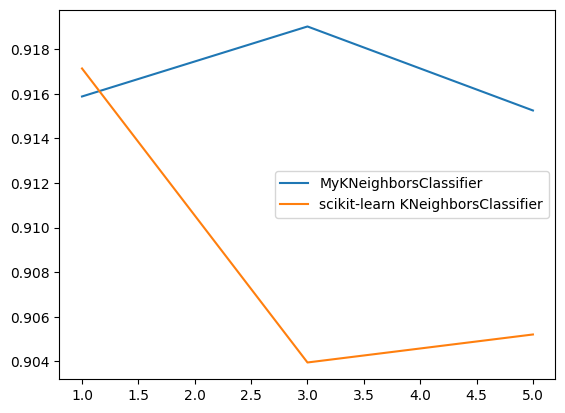

In [12]:
myKNNAccRates = [myAccRate1, myAccRate3, myAccRate5]
skKNNAccRates = [skAccRate1, skAccRate3, skAccRate5]
plt.plot([1,3,5], myKNNAccRates, label='MyKNeighborsClassifier')
plt.plot([1,3,5], skKNNAccRates, label='scikit-learn KNeighborsClassifier')
plt.legend()
plt.show()

从现有的不同k值（1，3，5）情况下的数据上来对比我们手动实现的KNN算法和利用sklearn库实现的KNN算法可以发现，我们的KNN算法能够达到较高的准确率（90%以上），与sklearn中的KNN算法准确率水平相当。  
为了更好的与机器学习包中的KNN分类结果进行对比，我们在利用sklearn实现KNN算法时采用了控制变量法尽可能地减少了除分类器内部实现以外的干扰因素的影响。  
因为我们采用了**留一法**来进行交叉验证，因此一般情况下在k值相同时我们得出的准确率应该是相同的，那么为什么会出现上面对比的不同呢？猜测可能的原因：
- 算法的具体实现上存在细节上的差异，如边界处理等
- 随机性：如距离相同时的处理方案、样本选择等

经过对比sklearn库中实现KNN算法的[源码](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/neighbors/_classification.py)我发现最有可能的原因就是在距离相同时的处理方案不同，我们手动实现的KNN算法遇到距离相同的情况时会选择第一个标签，而sklearn中的KNN算法是随机选取的标签。（当然，以上仅仅是个人的一个猜测，尚不能很好的解释这个现象）  
接下来我们改变k值再次对比两个KNN算法

In [1]:
myKNNaccuracy = []
skKNNaccuracy = []
for k in range(1,51):
    myKNNacc = MyKnnClassifier(X, y, k)
    myKNNaccuracy.append(myKNNacc)
    skKNNacc = skKnnClassifier(X, y, k)
    skKNNaccuracy.append(skKNNacc)
plt.plot(np.arange(1,51), myKNNaccuracy, label='MyKNeighborsClassifier')
plt.plot(np.arange(1,51), skKNNaccuracy, label='scikit-learn KNeighborsClassifier')
plt.legend()
plt.show()

NameError: name 'MyKnnClassifier' is not defined